In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Certainty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_excel("train_data.xlsx")

In [3]:
df.head()

,Utterance,Intent
0,Are email and Gmail the same thing?,account_information
1,Are email case sensitive?,account_information
2,How can you email?,account_information
3,Can emails be blocked?,account_information
4,Why is email marketing important?,account_information


In [4]:
df['Intent'].value_counts()

recommend_activity                    36
reservation_regulations               27
Tour available                        25
restaurant_enqiry                     24
account_information                   23
reservation_inquiry                   22
recommend_poi                         22
book_tour                             20
Tour enquiry                          15
describe_location                     15
generic_request                       14
needs_assistance                      14
restaurant_reservation_regulations     9
reservation_update_request             9
Tour cancel                            5
Tour enquiry pick-up                   5
Tour Offer                             3
Name: Intent, dtype: int64

In [5]:
ps = PorterStemmer()
corpus = []

In [6]:
# Preprocessing text
for i in range(0, len(df)):
    questions = re.sub('[^a-zA-Z]', ' ', df['Utterance'][i])
    questions = questions.lower()
    questions = questions.split()
    questions = [ps.stem(word) for word in questions if not word in stopwords.words('english')]
    questions = ' '.join(questions)
    corpus.append(questions)

In [7]:
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [8]:
df['category_id'] = df['Intent'].factorize()[0]

In [9]:
y = df['category_id']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [11]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [13]:
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)

In [14]:
score

0.4482758620689655

<AxesSubplot:>

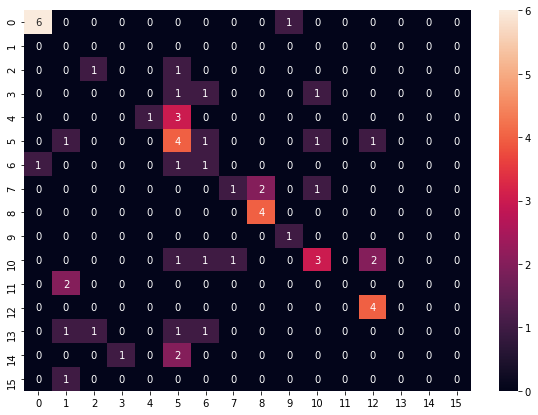

In [15]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [16]:
clf_full = MultinomialNB().fit(X, y)

In [17]:
df_test = pd.read_excel("Questions_test.xlsx")

In [18]:
df_test['Intent'].value_counts()

tour_available                        28
recommend_activity                    27
tour_inquiry                          21
recommend_poi                         17
restaurant_inquiry                    14
reservation_inquiry                   11
book_tour                             10
account_information                    8
reservation_regulations                7
needs_assistance                       7
tour_offer                             6
describe_location                      6
generic_request                        5
reservation_update_request             5
tour_inquiry_pick_up                   5
tour_cancel                            4
restaurant_reservation_regulations     2
Name: Intent, dtype: int64

In [19]:
corpus_test = []
for i in range(0, len(df_test)):
    questions = re.sub('[^a-zA-Z]', ' ', df_test['Utterance'][i])
    questions = questions.lower()
    questions = questions.split()
    
    questions = [ps.stem(word) for word in questions]
    questions = ' '.join(questions)
    corpus_test.append(questions)

In [20]:
cv = CountVectorizer(max_features=2500)
test_data_X = cv.fit_transform(corpus_test).toarray()

In [21]:
df_test['category_id'] = df_test['Intent'].factorize()[0]

In [22]:
test_data_y = df_test['category_id']

In [23]:
test_pred_y = clf_full.predict(test_data_X)

In [24]:
test_score = accuracy_score(test_data_y, test_pred_y)

In [25]:
test_score

0.09289617486338798

<AxesSubplot:>

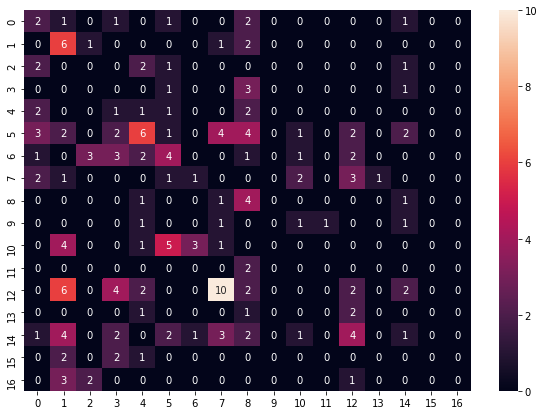

In [26]:
cm = confusion_matrix(test_data_y, test_pred_y)
df_cm = pd.DataFrame(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)